# バックテスト用

input:期間、所持金、使用するルール<br>
output:期間中の所持金の増減具合、図とシャープレシオの値<br>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

from trading_rule.only_macd_signal import trade
from tqdm import tqdm

In [17]:
#パラメータ
start = '2010-01-01'
end = '2020-12-31'
posses = {'JPY':10000,'USD':0}

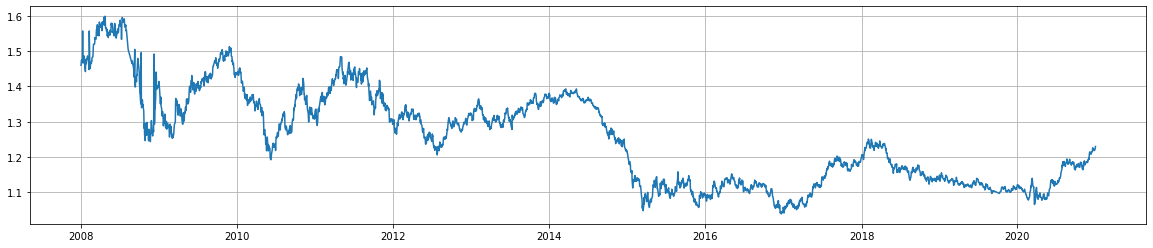

In [18]:
jpy_usd = pd.read_csv('../temp_data/eur_usd.csv')
jpy_usd.index = pd.to_datetime(jpy_usd['Date'])
del jpy_usd['Date']
jpy_usd = jpy_usd[:end]
plt.figure(figsize=(20,4))
plt.plot(jpy_usd['Close'])
plt.grid()
plt.show()

In [19]:
term_df = jpy_usd[start:end]

In [20]:
pos_trans = []
for i in tqdm(range(len(term_df))):
    posses = trade(current_day=str(term_df.index[i])[:10],posses=posses,df=jpy_usd)
    rec = posses.copy()
    rec['current_day'] = str(term_df.index[i])[:10]
    pos_trans.append(rec)
    
pos_trans = pd.DataFrame(pos_trans)

100%|██████████████████████████████████████████████████████████████████████████████| 2845/2845 [02:13<00:00, 21.30it/s]


In [21]:
pos_trans.index = pd.to_datetime(pos_trans['current_day'])
del pos_trans['current_day']

In [22]:
df = pd.concat([pos_trans,jpy_usd],axis=1)

In [23]:
df['JPY_POS'] = df['USD']*df['Close']+df['JPY']

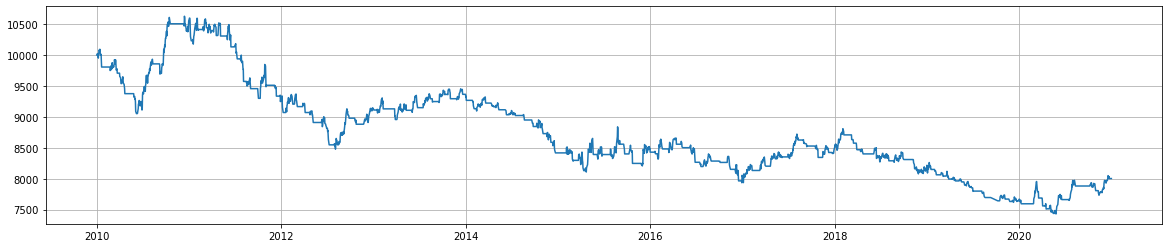

In [24]:
plt.figure(figsize=(20,4))
plt.plot(df['JPY_POS'])
plt.grid()
plt.show()

In [25]:
df = df.dropna()

In [26]:
df['base_pos'] = df['Close']/df.iloc[0,5]*10000

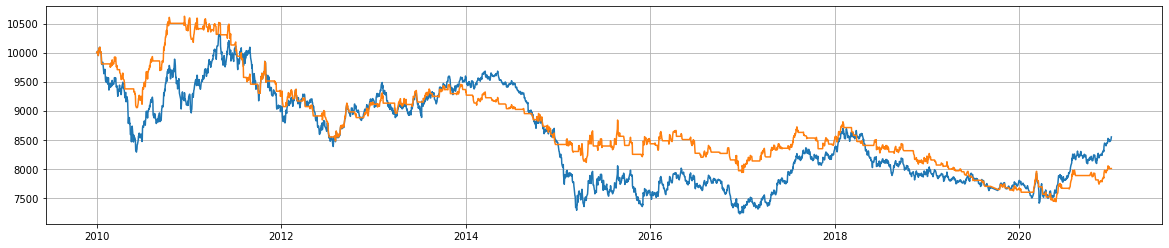

In [27]:
plt.figure(figsize=(20,4))
plt.plot(df['base_pos'])
plt.plot(df['JPY_POS'])
plt.grid()
plt.show()

In [13]:
risk = df['JPY_POS'].std()/10000

In [14]:
ret = (df['JPY_POS'].mean()-10000)/10000

In [15]:
ret/risk

-1.1060969481413097